In [5]:
!mkdir image-dataset

In [8]:
!unzip train.zip -d image-dataset

Streaming output truncated to the last 5000 lines.
 extracting: image-dataset/train/595.png  
 extracting: image-dataset/train/5950.png  
 extracting: image-dataset/train/59500.png  
 extracting: image-dataset/train/59501.png  
 extracting: image-dataset/train/59502.png  
 extracting: image-dataset/train/59503.png  
 extracting: image-dataset/train/59504.png  
 extracting: image-dataset/train/59505.png  
 extracting: image-dataset/train/59506.png  
 extracting: image-dataset/train/59507.png  
 extracting: image-dataset/train/59508.png  
 extracting: image-dataset/train/59509.png  
 extracting: image-dataset/train/5951.png  
 extracting: image-dataset/train/59510.png  
 extracting: image-dataset/train/59511.png  
 extracting: image-dataset/train/59512.png  
 extracting: image-dataset/train/59513.png  
 extracting: image-dataset/train/59514.png  
 extracting: image-dataset/train/59515.png  
 extracting: image-dataset/train/59516.png  
 extracting: image-dataset/train/59517.png  
 extract

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(60000, 2)
(10000, 1)


In [12]:
train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [13]:
test.head()

,id
0,60001
1,60002
2,60003
3,60004
4,60005


In [14]:
train.label.value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: label, dtype: int64

In [15]:
import os
import shutil

In [16]:
len(os.listdir('/content/image-dataset/train'))

60000

In [17]:
!mkdir sample

In [18]:
for i in range(0,10):
    os.makedirs('/content/sample/'+str(i))

In [19]:
for index in train.index:
    for folder_name in range(0,10):
        if train.loc[index, 'label'] == int(os.path.basename('/content/sample/'+str(folder_name))):
            shutil.copy('/content/image-dataset/train/'+str(train.loc[index, 'id'])+'.png', os.path.join('/content/sample/'+str(folder_name)+'/'))

In [20]:
for i in range(0,10): 
    print(len(os.listdir('/content/sample/'+str(i))))

6000
6000
6000
6000
6000
6000
6000
6000
6000
6000


In [21]:
os.makedirs('/content/sample/train')
os.makedirs('/content/sample/test')
os.makedirs('/content/sample/val')

In [22]:
for i in range(0,10):
    os.makedirs('/content/sample/train/'+str(i))
    os.makedirs('/content/sample/test/'+str(i))
    os.makedirs('/content/sample/val/'+str(i))

In [23]:
os.listdir('/content/sample/train/')

['2', '6', '0', '5', '8', '9', '4', '3', '7', '1']

In [24]:
folder_list = [str(i)+'/' for i in range(0,10)]
folder_list

['0/', '1/', '2/', '3/', '4/', '5/', '6/', '7/', '8/', '9/']

In [25]:
NEW_BASE = '/content/sample/'

In [26]:
for folder_idx, folder in enumerate(folder_list):
    files = os.listdir(NEW_BASE + folder)
    folder_name = folder.split('/')[0]
    number_of_images = len([name for name in files])
    n_train = int((number_of_images * 0.6) + 0.5)
    n_valid = int((number_of_images*0.25) + 0.5)
    n_test = number_of_images - n_train - n_valid
    print(number_of_images, n_train, n_valid, n_test)
    for idx, file in enumerate(files):
        file_name = NEW_BASE + folder + file
        if idx < n_train:
            shutil.move(file_name, NEW_BASE + "train/" + folder_name)
        elif idx < n_train + n_valid:
            shutil.move(file_name, NEW_BASE + "val/" + folder_name)
        else:
            shutil.move(file_name, NEW_BASE + "test/" + folder_name)

6000 3600 1500 900
6000 3600 1500 900
6000 3600 1500 900
6000 3600 1500 900
6000 3600 1500 900
6000 3600 1500 900
6000 3600 1500 900
6000 3600 1500 900
6000 3600 1500 900
6000 3600 1500 900


In [27]:
for i in range(0,10):
    os.rmdir('/content/sample/'+str(i))

In [28]:
import matplotlib.image as mpimg

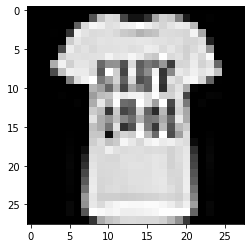

In [29]:
test_image = mpimg.imread(os.path.join('/content/sample/train/0/10008.png'))
plt.imshow(test_image)

In [30]:
test_image.shape

(28, 28, 4)

In [31]:
test_image

array([[[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       ...,

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0.

In [32]:
name_list = [str(i) for i in range(0, 10)]
name_list

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [33]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_batches = train_gen.flow_from_directory(
    '/content/sample/train',
    target_size=(28, 28),
    class_mode='sparse',
    batch_size=32,
    shuffle=True,
    color_mode="grayscale",
    classes=name_list   
)

val_batches = valid_gen.flow_from_directory(
    '/content/sample/val',
    target_size=(28, 28),
    class_mode='sparse',
    batch_size=32,
    shuffle=True,
    color_mode="grayscale",
    classes=name_list
)

test_batches = test_gen.flow_from_directory(
    '/content/sample/test',
    target_size=(28, 28),
    class_mode='sparse',
    batch_size=32,
    shuffle=False,
    color_mode="grayscale",
    classes=name_list
)

Found 36000 images belonging to 10 classes.
Found 15000 images belonging to 10 classes.
Found 9000 images belonging to 10 classes.


In [34]:
train_batch = train_batches[0]
print(train_batch[0].shape)
print(train_batch[1])
test_batch = test_batches[0]
print(test_batch[0].shape)
print(test_batch[1])

(32, 28, 28, 1)
[5. 8. 6. 2. 6. 1. 1. 7. 2. 7. 6. 9. 6. 6. 8. 5. 2. 2. 4. 8. 0. 5. 2. 4.
 2. 5. 3. 8. 6. 9. 9. 7.]
(32, 28, 28, 1)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [36]:
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(layers.Conv2D(64, (3,3), padding="same", activation='relu', input_shape=(28,28, 1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, 3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(62, activation='relu'))
model.add(layers.Dense(10))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               5

In [37]:
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.01)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [38]:
keras.backend.clear_session()
epochs = 50

# early_stopping = keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     patience=5,
#     verbose=2
# )

model.fit(train_batches, validation_data=val_batches,
        #   callbacks=[early_stopping],
          epochs=epochs, verbose=2)

Epoch 1/50
1125/1125 - 33s - loss: 0.4959 - accuracy: 0.8184 - val_loss: 0.4149 - val_accuracy: 0.8443 - 33s/epoch - 30ms/step
Epoch 2/50
1125/1125 - 22s - loss: 0.3671 - accuracy: 0.8663 - val_loss: 0.3811 - val_accuracy: 0.8649 - 22s/epoch - 19ms/step
Epoch 3/50
1125/1125 - 22s - loss: 0.3478 - accuracy: 0.8726 - val_loss: 0.3432 - val_accuracy: 0.8753 - 22s/epoch - 19ms/step
Epoch 4/50
1125/1125 - 22s - loss: 0.3362 - accuracy: 0.8778 - val_loss: 0.3555 - val_accuracy: 0.8713 - 22s/epoch - 20ms/step
Epoch 5/50
1125/1125 - 22s - loss: 0.3231 - accuracy: 0.8821 - val_loss: 0.3607 - val_accuracy: 0.8654 - 22s/epoch - 19ms/step
Epoch 6/50
1125/1125 - 22s - loss: 0.3172 - accuracy: 0.8847 - val_loss: 0.3789 - val_accuracy: 0.8679 - 22s/epoch - 19ms/step
Epoch 7/50
1125/1125 - 22s - loss: 0.3051 - accuracy: 0.8879 - val_loss: 0.3591 - val_accuracy: 0.8771 - 22s/epoch - 19ms/step
Epoch 8/50
1125/1125 - 21s - loss: 0.3083 - accuracy: 0.8888 - val_loss: 0.3758 - val_accuracy: 0.8785 - 21s/ep

In [39]:
# evaluate on test data
model.evaluate(test_batches, verbose=2)

282/282 - 4s - loss: 0.8263 - accuracy: 0.8753 - 4s/epoch - 13ms/step


[0.8263350129127502, 0.875333309173584]

In [40]:
# make some predictions
predictions = model.predict(test_batches)
predictions = tf.nn.softmax(predictions)
labels = np.argmax(predictions, axis=1)

print(test_batches[0][1])
print(labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0 0 2 ... 9 9 9]


In [41]:
len(labels)

9000

In [42]:
test_batch[0][1].shape

(28, 28, 1)

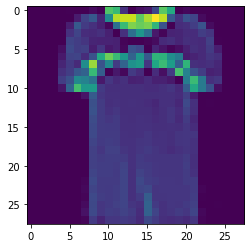

In [45]:
plt.imshow(test_batch[0][1].reshape(28, 28))

In [46]:
pred1 = model.predict(test_batch[0][1].reshape(1, 28,28,1))
pred1 = tf.nn.softmax(pred1)
label1 = np.argmax(pred1, axis=1)
label1

array([0])

In [47]:
test_batch[0].shape

(32, 28, 28, 1)

In [48]:
test_batch[1].shape

(32,)

In [49]:
test_batches[40][1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [50]:
pred2 = model.predict(test_batches[40][0][1].reshape(1, 28,28,1))
pred2 = tf.nn.softmax(pred2)
label2 = np.argmax(pred2, axis=1)
label2

array([1])

In [51]:
!unzip test.zip -d image-dataset/

Streaming output truncated to the last 5000 lines.
 extracting: image-dataset/test/65001.png  
 extracting: image-dataset/test/65002.png  
 extracting: image-dataset/test/65003.png  
 extracting: image-dataset/test/65004.png  
 extracting: image-dataset/test/65005.png  
 extracting: image-dataset/test/65006.png  
 extracting: image-dataset/test/65007.png  
 extracting: image-dataset/test/65008.png  
 extracting: image-dataset/test/65009.png  
 extracting: image-dataset/test/65010.png  
 extracting: image-dataset/test/65011.png  
 extracting: image-dataset/test/65012.png  
 extracting: image-dataset/test/65013.png  
 extracting: image-dataset/test/65014.png  
 extracting: image-dataset/test/65015.png  
 extracting: image-dataset/test/65016.png  
 extracting: image-dataset/test/65017.png  
 extracting: image-dataset/test/65018.png  
 extracting: image-dataset/test/65019.png  
 extracting: image-dataset/test/65020.png  
 extracting: image-dataset/test/65021.png  
 extracting: image-datase

In [52]:
len(os.listdir('/content/image-dataset/test'))

10000

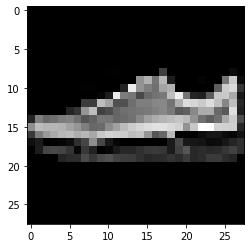

In [53]:
new_image = mpimg.imread('/content/image-dataset/test/60010.png')
plt.imshow(new_image)

In [54]:
new_image.shape

(28, 28, 4)

In [55]:
len(os.listdir('/content/image-dataset/test'))

10000

In [56]:
test_gen_new = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_preprocessed = test_gen_new.flow_from_directory(
    './image-dataset',
    class_mode='sparse',
    target_size=(28, 28),
    color_mode="grayscale",
    shuffle=False,
    classes=['test']
)

Found 10000 images belonging to 1 classes.


In [57]:
prediction_new = model.predict(test_preprocessed)

In [58]:
prediction_new = tf.nn.softmax(prediction_new)
label_new = np.argmax(prediction_new, axis=1)

In [59]:
submission = pd.read_csv('sample_submission_I5njJSF.csv')
submission.head()

,id,label
0,60001,0
1,60002,0
2,60003,0
3,60004,0
4,60005,0


In [60]:
submission['label'] = label_new

In [61]:
submission.head()

,id,label
0,60001,9
1,60002,2
2,60003,1
3,60004,1
4,60005,6


In [62]:
submission.to_csv("submission.csv", index=False, header=True)